# Word2Vec Analysis

In [1]:
import numpy as np
import pandas as pd 
data = pd.read_csv('songdata.csv')
data.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
from numba import cuda

In [2]:
l = list(data['text'])
l[0]

"Look at her face, it's a wonderful face  \nAnd it means something special to me  \nLook at the way that she smiles when she sees me  \nHow lucky can one fellow be?  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what could I do?  \n  \nAnd when we go for a walk in the park  \nAnd she holds me and squeezes my hand  \nWe'll go on walking for hours and talking  \nAbout all the things that we plan  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what could I do?\n\n"

In [3]:
import string
def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation).lower()
    txt = txt.replace("\n","")
    return txt 

corpus = [clean_text(x) for x in l]
corpus[0]

'look at her face its a wonderful face  and it means something special to me  look at the way that she smiles when she sees me  how lucky can one fellow be    shes just my kind of girl she makes me feel fine  who could ever believe that she could be mine  shes just my kind of girl without her im blue  and if she ever leaves me what could i do what could i do    and when we go for a walk in the park  and she holds me and squeezes my hand  well go on walking for hours and talking  about all the things that we plan    shes just my kind of girl she makes me feel fine  who could ever believe that she could be mine  shes just my kind of girl without her im blue  and if she ever leaves me what could i do what could i do'

In [27]:
len(corpus)

57650

In [39]:
len(corpus[0])

153

In [4]:
for i in range(0,len(corpus)):
    corpus[i] = corpus[i].split(" ")
    corpus[i] = [x for x in corpus[i] if x]

In [37]:
len(corpus)

57650

In [38]:
len(corpus[0])

153

In [5]:
import gensim  
from gensim.models import Word2Vec

C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [6]:
model = Word2Vec(corpus, min_count=1, size=20)

In [47]:
words = list(model.wv.vocab)
len(words)

103134

## Vectorized form of a word

In [7]:
model.wv.__getitem__('word')

array([-0.87428939,  7.26639462, -1.81739473,  0.80570143,  4.13080835,
       -0.52676028,  0.12912202,  3.39074779, -2.61870766,  1.08761406,
        1.7063899 , -0.79493886,  2.41979957,  3.04448152,  1.63739264,
        1.19934738, -0.03373571,  1.20358157, -4.13078213,  0.18135065], dtype=float32)

In [8]:
model.wv.most_similar('music')

[('melody', 0.8148568868637085),
 ('radio', 0.8147398233413696),
 ('rhythm', 0.8021312952041626),
 ('noise', 0.7845739126205444),
 ('sound', 0.7721367478370667),
 ('song', 0.7700511813163757),
 ('tune', 0.7621098756790161),
 ('chickenass', 0.745398759841919),
 ('theshow', 0.7370048761367798),
 ('jangle', 0.7250267863273621)]

In [66]:
model.wv.most_similar('love')

[('loving', 0.8899664878845215),
 ('hope', 0.874354362487793),
 ('mine', 0.8602503538131714),
 ('life', 0.8560549020767212),
 ('believe', 0.8558452725410461),
 ('true', 0.8549146056175232),
 ('dream', 0.8503168821334839),
 ('raftersred', 0.8391464352607727),
 ('everything', 0.8320201635360718),
 ('promise', 0.8309168815612793)]

In [68]:
model.wv.most_similar('word')

[('story', 0.8705061674118042),
 ('book', 0.8008494973182678),
 ('name', 0.7951470613479614),
 ('hatform', 0.7924187183380127),
 ('letter', 0.7804446816444397),
 ('thing', 0.775516927242279),
 ('vow', 0.7367196679115295),
 ('voice', 0.7348980903625488),
 ('request', 0.7313973903656006),
 ('gift', 0.7308410406112671)]

In [69]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.8560591340065002),
 ('born', 0.7943884134292603),
 ('lamb', 0.7876380681991577),
 ('christ', 0.7743855118751526),
 ('child', 0.7737903594970703),
 ('jesus', 0.7685632705688477),
 ('legend', 0.7563323974609375),
 ('prince', 0.7492373585700989),
 ('iacocas', 0.7083836197853088),
 ('god', 0.7039011120796204)]

### The generic prediction works

In [71]:
model.wv.most_similar(positive=['love', 'day'], negative=['hate'])

[('night', 0.8698436617851257),
 ('moment', 0.839569091796875),
 ('morning', 0.7940908670425415),
 ('time', 0.7896767854690552),
 ('lifetime', 0.7751429080963135),
 ('dawn', 0.7643657326698303),
 ('year', 0.7614933252334595),
 ('dream', 0.7571679353713989),
 ('train', 0.7457009553909302),
 ('througth', 0.739289402961731)]

## Love to hate is like day to night..... Well well well....I'm pretty excited with the results

In [76]:
## Word that doesn't belong there
model.wv.doesnt_match("life hope dream spirit death".split())

'death'

In [81]:
model.wv.doesnt_match("car train bike night".split())

'night'

In [86]:
model.wv.doesnt_match("rap eminem melody drake".split())

'melody'

## NOICE RESULTS

C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



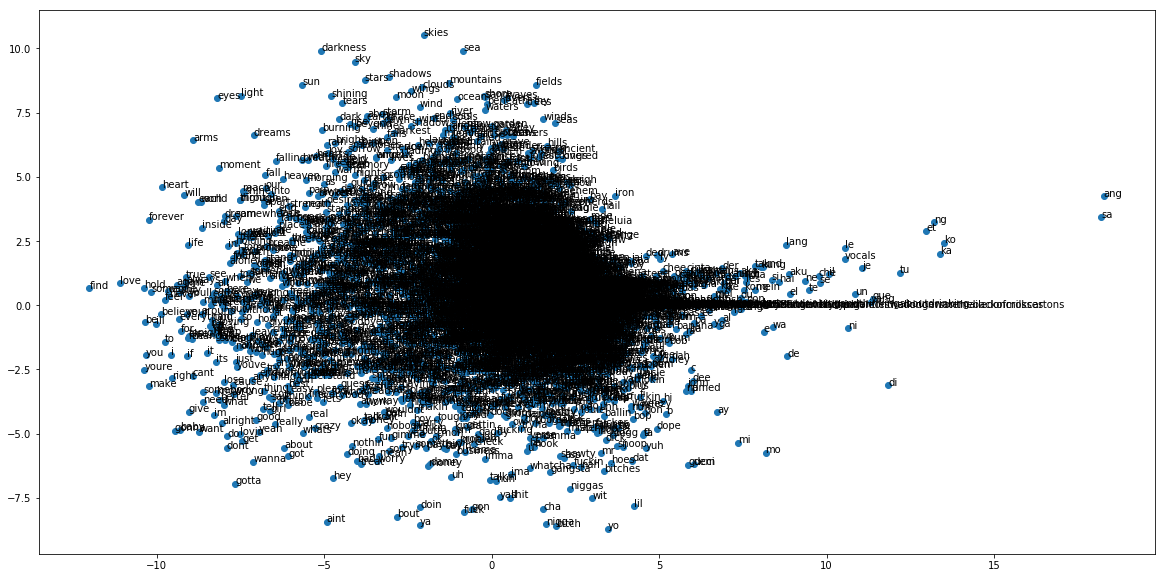

In [19]:
from sklearn.decomposition import PCA, TruncatedSVD
from matplotlib import pyplot

% matplotlib inline
pyplot.figure(figsize=(20,10))
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [22]:
model.wv.most_similar('niggas')

[('niggaz', 0.9589294195175171),
 ('hoes', 0.9406366348266602),
 ('bitches', 0.9240328073501587),
 ('motherfuckers', 0.9128241539001465),
 ('haters', 0.9027832746505737),
 ('nigga', 0.863408088684082),
 ('rappers', 0.8613440990447998),
 ('shit', 0.8439674377441406),
 ('drugs', 0.8391104936599731),
 ('dudes', 0.8247038125991821)]

# Looks like our model is incredibly racist........Gonna have to improve on that